In [10]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten, RandomFlip, RandomRotation,  RandomTranslation, RandomZoom

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os


In [11]:
def to_grayscale(image, label):
    # Convert image to grayscale
    image = tf.image.rgb_to_grayscale(image)  # Shape becomes (300, 300, 1)
    return image, label

In [12]:
cwd = os.getcwd()
DIR = lambda type : os.getcwd()+ f'/dataset/{type}'
print(DIR('train'))
print(DIR('validation'))



c:\Users\Alan\Documents\Python Scripts\Bangkit\Capstone_bangkit/dataset/train
c:\Users\Alan\Documents\Python Scripts\Bangkit\Capstone_bangkit/dataset/validation


In [20]:
# Constants
BATCH_SIZE = 32
IMAGE_SIZE = (300, 300)
LABEL_MODE = 'categorical'


# Instantiate the training dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    DIR('train'),
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode=LABEL_MODE
    )

# Instantiate the validation set
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    DIR('validation'),
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode=LABEL_MODE
    )

# Optimize the datasets for training
SHUFFLE_BUFFER_SIZE = 100
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset_final = (train_dataset
                       .cache()
                       .shuffle(SHUFFLE_BUFFER_SIZE)
                       .prefetch(PREFETCH_BUFFER_SIZE)
                       )

validation_dataset_final = (validation_dataset
                            .cache()
                            .prefetch(PREFETCH_BUFFER_SIZE)
                            )

Found 1579 files belonging to 6 classes.
Found 677 files belonging to 6 classes.


In [28]:
def augmentimages(size=(300, 300, 3)):
          data = Sequential([
                    Input(shape=size),
                    RandomFlip("horizontal"),
                    RandomRotation(0.3, fill_mode='nearest'),
                    RandomTranslation(0.2, 0.3, fill_mode='nearest'),
                    RandomZoom(0.3, fill_mode='nearest'),
                    ])
          return data
          
                    

In [29]:
def create_model():
          data = Sequential([
                    Input(shape=(300, 300, 3)),
                    tf.keras.layers.Rescaling(1./255),
                    
                    Conv2D(16, (5,5), activation='relu'),
                    MaxPooling2D(2, 2),
                    
                    Conv2D(32, (4,4), activation='relu'),
                    MaxPooling2D(2, 2),
                    
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPooling2D(2, 2),
                    
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPooling2D(2, 2),
                    
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPooling2D(2, 2),
                    
                    Flatten(),
                    Dense(1024, activation='relu'),
                    Dense(512, activation='relu'),
                    Dense(256, activation='relu'),
                    Dense(6, activation='softmax')
          ])
          return data

In [30]:
# Instantiate the base model
data_augmentation = augmentimages()
temp_model = create_model()

# Prepend the data augmentation layers to the base model
final_model = tf.keras.models.Sequential([
    data_augmentation,
    temp_model
])

# Compile the model
final_model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])




In [31]:
# Constant for epochs
EPOCHS = 20

# Train the model
history = final_model.fit(
      train_dataset_final,
      epochs=EPOCHS,
      verbose=2,
      validation_data = validation_dataset_final)

Epoch 1/20
50/50 - 12s - 245ms/step - accuracy: 0.2065 - loss: 1.7265 - val_accuracy: 0.2230 - val_loss: 1.7248
Epoch 2/20
50/50 - 10s - 203ms/step - accuracy: 0.2964 - loss: 1.6486 - val_accuracy: 0.3146 - val_loss: 1.8307
Epoch 3/20
50/50 - 10s - 201ms/step - accuracy: 0.3350 - loss: 1.5944 - val_accuracy: 0.2585 - val_loss: 1.7089
Epoch 4/20
50/50 - 10s - 202ms/step - accuracy: 0.4003 - loss: 1.5094 - val_accuracy: 0.3693 - val_loss: 1.7747
Epoch 5/20
50/50 - 11s - 219ms/step - accuracy: 0.4091 - loss: 1.4380 - val_accuracy: 0.3722 - val_loss: 1.6423
Epoch 6/20
50/50 - 11s - 212ms/step - accuracy: 0.4357 - loss: 1.4146 - val_accuracy: 0.4047 - val_loss: 1.6504
Epoch 7/20
50/50 - 10s - 205ms/step - accuracy: 0.4376 - loss: 1.4137 - val_accuracy: 0.3604 - val_loss: 1.5997
Epoch 8/20
50/50 - 10s - 204ms/step - accuracy: 0.4560 - loss: 1.3599 - val_accuracy: 0.4121 - val_loss: 1.5456
Epoch 9/20
50/50 - 10s - 206ms/step - accuracy: 0.4649 - loss: 1.3379 - val_accuracy: 0.3161 - val_loss:

In [35]:
def plot_loss_acc(history):
    '''Plots the training and validation loss and accuracy from a history object'''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    fig, ax = plt.subplots(1,2, figsize=(12, 6))
    ax[0].plot(epochs, acc, 'bo', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel('accuracy')
    ax[0].legend()

    ax[1].plot(epochs, loss, 'bo', label='Training Loss')
    ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
    ax[1].set_title('Training and validation loss')
    ax[1].set_xlabel('epochs')
    ax[1].set_ylabel('loss')
    ax[1].legend()

    plt.show()

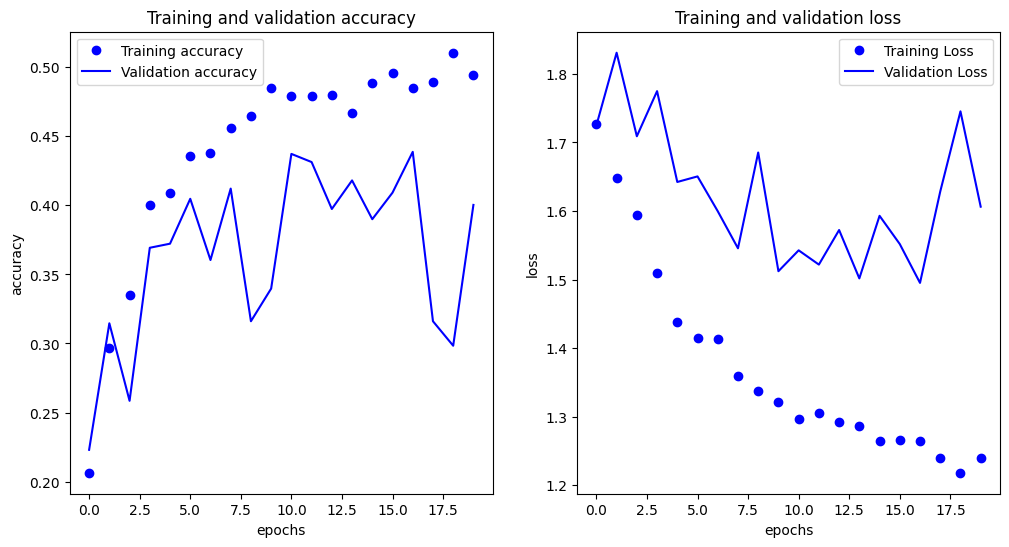

In [36]:
# Plot training results
plot_loss_acc(history)